---
title: "Homework 3"
format: html
---

__Due Date:__ 2022-10-30 at 8:30 AM PT
---

__Name:__ Luke Schlake


## Preparation

1. Create a 'code' folder in the root directory of your repository.
1. Inside the 'code' folder, create a file '01_clean_data.\<your_extension_here\>'.
Your extension should be the one you use for your programming language of choice (e.g., '.R' for R, '.py' for Python, '.jl' for Julia).
1. Copy any code from HW_02 you need to subset and merge the NRI and SVI datasets into the '01_clean_data' file.
1. Add a 'processed' directory to the 'data' folder.
1. Add a line at the end of the file that saves the merged dataset to 'data/processed' directory.
1. Run the '01_clean_data' file to ensure that the merged dataset runs and creates the proper file.
1. Add and commit the '01_clean_data' file to the repository.

## Homework - Principal Component Analysis

The CDC Social Vulnerability Index (SVI) takes multiple differen population-level inputs (e.g., % of the population living in poverty, % of the population without health insurance) to identify particularly vulnerable counties.
While the CDC SVI scores rely on adding up the percentiles of various characteristics, there are alternative indexes (e.g., [University of South Carolina SoVI index](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/index.php)) that use methods like PCA.
Here, we are going to use the CDC SVI data to create an alternative index based on PCA.

1. The following variables are used in the SVI:
`EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`
    a. Subset the merged dataset to only include the variables above and look at the pattern of missing data.
    Are missing observations scattered throughout the data or are entire rows or columns missing?
    b. PCA cannot handle missing values by default.
    There are several options for handling missing data generally, including imputation, removing rows with missing data, or removing columns with missing data.
    Deal with the missing data in a way that makes sense for the pattern of missing data and the goals of the analysis. Explain why you made this decision.
    _Note: How you handle this is specific to the missing data pattern and the goals of the analysis.
    For example, when entire rows or columns are missing, imputation may not be appropriate and dropping those rows or columns is usually the best option.
    Conversely, if you have a general missingness pattern where missing observations are scattered throughout the data, imputation is likely the best option._
    a. After dealing with the missing data, perform PCA on the SVI variables.

In [ ]:
import pandas as pd
merged_data = pd.read_csv("C:\\Users\\lschlake\\Documents\\2024-2025Courses\\PRGS-Intro-to-ML-2024-1\\data\\processed\\merged_data.csv")

list = ["EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR", "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG", "EP_MINRTY", "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH", "EP_GROUPQ", "EP_NOINT"]

filtered=pd.DataFrame()

for x in list:
    filtered[x]=merged_data[x]

pd.set_option("display.max_rows", None)

missing=filtered.isna()
missing.sum()
missing[missing["EP_UNEMP"]==1].sum()
   


EP_POV150     96
EP_UNEMP      96
EP_HBURD      96
EP_NOHSDP     96
EP_UNINSUR    96
EP_AGE65      96
EP_AGE17      96
EP_DISABL     96
EP_SNGPNT     96
EP_LIMENG     96
EP_MINRTY     96
EP_MUNIT      96
EP_MOBILE     96
EP_CROWD      96
EP_NOVEH      96
EP_GROUPQ     96
EP_NOINT      96
dtype: int64

An examination of the data reveals 96 missing values in each columns, suggesting there are a handful of rows completely missing from the data. Filtering for rows in which the EP_UNEMP are missing reveals 96 rows in which data is missing in every column. I drop these columns below: 


In [ ]:

pd.set_option("display.max_rows", 15)

    #Drop rows if EP_UNEMP equals 0
data = filtered[filtered["EP_UNEMP"].isna()==0]

    #Check how many values are zero
data.isna().sum()


    #Principle Component Analysis 

    
    #PCA steps: 
    #1. Get original data
    #2. Calculate covariance matrix
    #3. Sort eigenvector by eigenvalues (to determine vectors of highest explanatory power)
    #4. Choose N largest engenvalues
    #5. Project original data onto eigenvectors


    #The math underlying PCA, covariance + eigenvals/vecs
from sklearn.preprocessing import StandardScaler
import numpy as np

    #Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

    #Create the covariance matrix
cov_matrix =np.cov(scaled,rowvar=True)

    #Get the eigen values, vectors
values,vectors=np.linalg.eig(cov_matrix)
   


    #Applying Principle Component Analysis 

from sklearn.decomposition import PCA 
pca_instance = PCA(n_components=15)
#applying PCA 
decomp = pca_instance.fit_transform(scaled)
vectors = pd.DataFrame(decomp)




1. Plot the eigenvectors or loadings associated of the first three principal components.
Make sure that the axis labels correspond to the variable names and not the indices of the variables.
How would you interpret the first three prinicpal components?
_Note: you can find the documentation for the SVI variables [here](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2022.html)._


In [ ]:
import matplotlib.pyplot as plt

    
pd.set_option("display.max_rows", None)

    #Load the principle components into a dataframe, setting the 
    #column headers from the dataframe as the indices 
loadings = pd.DataFrame(pca_instance.components_.T,index=missing.columns)

loadings["var"]=loadings.index
    #Print the first three columns
top_three_loading=loadings[[0,1,2,"var"]].sort_values(by=0)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'EP_POV150'),
  Text(1, 0, 'EP_UNEMP'),
  Text(2, 0, 'EP_HBURD'),
  Text(3, 0, 'EP_NOHSDP'),
  Text(4, 0, 'EP_UNINSUR'),
  Text(5, 0, 'EP_AGE65'),
  Text(6, 0, 'EP_AGE17'),
  Text(7, 0, 'EP_DISABL'),
  Text(8, 0, 'EP_SNGPNT'),
  Text(9, 0, 'EP_LIMENG'),
  Text(10, 0, 'EP_MINRTY'),
  Text(11, 0, 'EP_MUNIT'),
  Text(12, 0, 'EP_MOBILE'),
  Text(13, 0, 'EP_CROWD'),
  Text(14, 0, 'EP_NOVEH'),
  Text(15, 0, 'EP_GROUPQ'),
  Text(16, 0, 'EP_NOINT')])

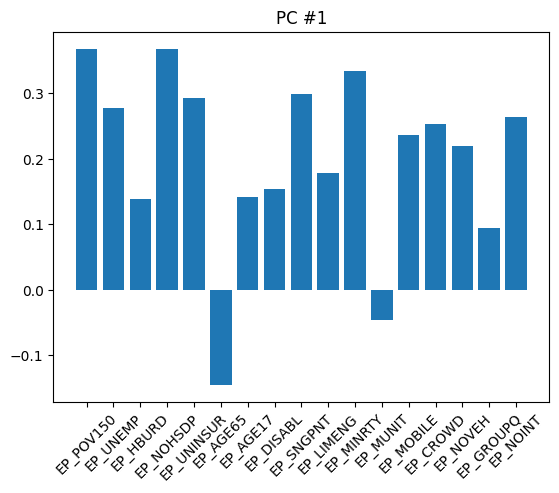

In [ ]:
plt.title("PC #1")
plt.bar(loadings['var'],loadings[0])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'EP_POV150'),
  Text(1, 0, 'EP_UNEMP'),
  Text(2, 0, 'EP_HBURD'),
  Text(3, 0, 'EP_NOHSDP'),
  Text(4, 0, 'EP_UNINSUR'),
  Text(5, 0, 'EP_AGE65'),
  Text(6, 0, 'EP_AGE17'),
  Text(7, 0, 'EP_DISABL'),
  Text(8, 0, 'EP_SNGPNT'),
  Text(9, 0, 'EP_LIMENG'),
  Text(10, 0, 'EP_MINRTY'),
  Text(11, 0, 'EP_MUNIT'),
  Text(12, 0, 'EP_MOBILE'),
  Text(13, 0, 'EP_CROWD'),
  Text(14, 0, 'EP_NOVEH'),
  Text(15, 0, 'EP_GROUPQ'),
  Text(16, 0, 'EP_NOINT')])

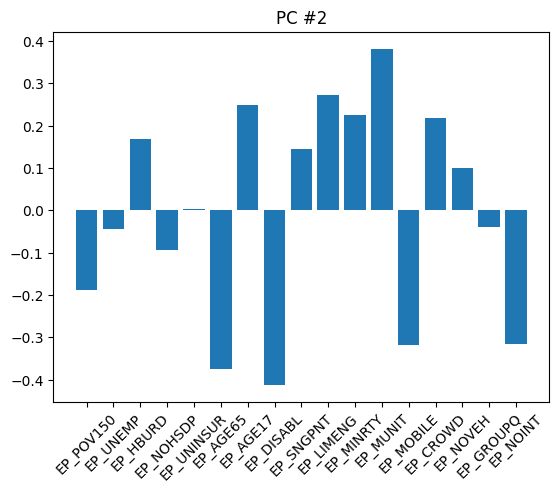

In [ ]:
plt.title("PC #2")
plt.bar(loadings['var'],loadings[1])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'EP_POV150'),
  Text(1, 0, 'EP_UNEMP'),
  Text(2, 0, 'EP_HBURD'),
  Text(3, 0, 'EP_NOHSDP'),
  Text(4, 0, 'EP_UNINSUR'),
  Text(5, 0, 'EP_AGE65'),
  Text(6, 0, 'EP_AGE17'),
  Text(7, 0, 'EP_DISABL'),
  Text(8, 0, 'EP_SNGPNT'),
  Text(9, 0, 'EP_LIMENG'),
  Text(10, 0, 'EP_MINRTY'),
  Text(11, 0, 'EP_MUNIT'),
  Text(12, 0, 'EP_MOBILE'),
  Text(13, 0, 'EP_CROWD'),
  Text(14, 0, 'EP_NOVEH'),
  Text(15, 0, 'EP_GROUPQ'),
  Text(16, 0, 'EP_NOINT')])

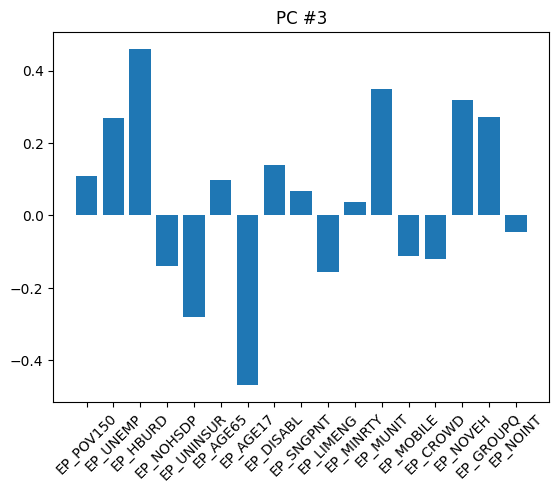

In [ ]:
plt.title("PC #3")
plt.bar(loadings['var'],loadings[2])
plt.xticks(rotation=45)


1. There are several different ways to determine the number of principal components to retain.
One common method is to retain principal components that explain a certain percentage of the variance in the data.
    a. How many principal components are needed to explain 80% of the variance in the data?
    a. How many principal components are needed to explain 90% of the variance in the data?



In [ ]:

    #Returns explained variance per principle component in  
    #a Dataframe. Because everything is better in a dataframe. 
variance_absorbed=pd.DataFrame(pca_instance.explained_variance_ratio_)

    #Outputs the explained variance per PC
variance_absorbed.sort_values(by=0, ascending=False)

    #Cumulative sum of the explained variance 
variance_absorbed.cumsum()

,0
0,0.282259
1,0.473965
2,0.582244
3,0.650275
4,0.709564
5,0.766767
6,0.803213
7,0.837468
8,0.866992
9,0.893244



Approximately 6 principle components are needed to explain 80% of the variance in the data. 
Approximately 9 principle components are needed to explain 90% of the variance in the data. 

1. An alternative approach is to plot the eigenvalues of the principal components and retain the components that are above the "elbow" in the plot. In other words the eigenvalues that are substantially larger than the rest.
a. Create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) of the eigenvalues of the principal components.
a. How many principal components should be retained based on the scree plot? This video may help: [PCA Scree Plot](https://youtu.be/vFUvNICWVz4?si=6NbyRcLRGT8L1HzI)



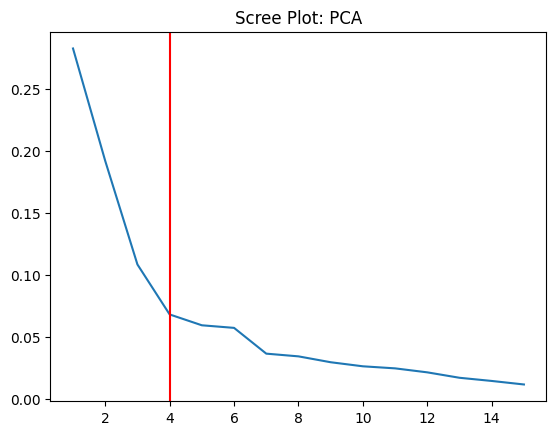

In [ ]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
variance_absorbed_ratio = pca_instance.explained_variance_ratio_

plt.figure()
plt.title("Scree Plot: PCA")
plt.plot(x,variance_absorbed)
plt.axvline(x=4,color='r')


The scree plot indicates that after 4 principle components, the explained variation per component begins to significantly decrease (the "elbow" method). Once could argue the true elbow is at 6 principle components. 





1. Cross-validation is another method to determine the number of principal components to retain.
This process requires some linear algebra that is beyond the scope of this course.
As such, I have written example [code](https://github.com/gabehassler/PRGS-Intro-to-ML-2024/blob/main/examples/pca_cross_validation.jl) in Julia that demonstrates how to perform cross-validation.
This procedure is a simplified versionof an approach explained in this [blog post](https://alexhwilliams.info/itsneuronalblog/2018/02/26/crossval/).
For the purposes of this assignment, the `pca_cv_error` function is a black box that returns the cross-validation error for a given number of principal components.
_Note: If you use a different programming language, you can use ChatGPT to translate the code to your language of choice._
    a. Compute the cross-validation error for 1 to 17 principal components. If this process is parallelizable, parallelize the code. If setting a random number seed would make this work more reproducible, set a random number seed.
    a. How many principal components should be retained based on the cross-validation error?



In [ ]:
    
#The julia function pca_cv_error was translated to python using RANDChat 

import numpy as np
import pandas as pd
from numpy.linalg import svd

    # Approximates the data matrix X using the first k principal components
    # X must be standardized to have mean 0 and standard deviation 1
def pca_approx(X, k):
        U, S, Vt = svd(X, full_matrices=False)
        Uk = U[:, :k]
        Sk = np.diag(S[:k])
        Vtk = Vt[:k, :]
        return Uk @ Sk @ Vtk


    # Computes the cross-validated error of approximating X using the first k principal components
    # X must be standardized to have mean 0 and standard deviation 1
def pca_cv_error(X, k, folds):

        #X is the scaled data
        #k is the number of folds. I'll select 10
        #

        fs = np.unique(folds)
        means = np.mean(X, axis=0)
        errs = np.zeros(len(fs))

        for i, f in enumerate(fs):
            X_cv = X.copy()
            for j in range(X.shape[1]):
                for i in range(X.shape[0]):
                    if folds[i, j] == f:
                        X_cv[i, j] = means[j]

            X_hat = pca_approx(X_cv, k)
            err = 0.0
            for j in range(X.shape[1]):
                for i in range(X.shape[0]):
                    if folds[i, j] == f:
                        err += (X_hat[i, j] - X[i, j]) ** 2
            errs[f - 1] = err

        return np.sum(errs) / X.size

    # Load the data
data = pd.read_csv("C:\\Users\\lschlake\\Documents\\2024-2025Courses\\PRGS-Intro-to-ML-2024-1\\data\\processed\\merged_data.csv", na_values="NA")

    # Subset and clean the data
vars = ["EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR", 
            "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG", "EP_MINRTY", 
            "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH", "EP_GROUPQ", "EP_NOINT"]
data_svi = data[vars].dropna()

    # Convert the data to a matrix and standardize it
X = data_svi.values
mu = np.mean(X, axis=0)
sd = np.std(X, axis=0)
X = (X - mu) / sd

    # Create a matrix of random folds
n_folds = 20
folds = np.random.randint(1, n_folds + 1, size=X.shape)

    # Compute the cross-validated error of approximating X using the first k principal components for k = 1:17
errors = np.zeros(17)
for k in range(1, 18):
        errors[k - 1] = pca_cv_error(X, k, folds)

    # Determine the optimal number of principal components
optimal_k = np.argmin(errors) + 1

    # Output the errors and the optimal number of principal components
print("Cross-validated errors for each k:", errors)
print("Optimal number of principal components:", optimal_k)
   


Cross-validated errors for each k: [0.79479683 0.65579674 0.60051431 0.58507491 0.57641935 0.54758184
 0.5623965  0.5743152  0.59542955 0.62281897 0.65561074 0.69261281
 0.74148979 0.79588349 0.85554213 0.92672135 1.        ]
Optimal number of principal components: 6


My understanding of using CV for PCA is as follows: We want to select the optimal number of components that to explain variance in the data while not over-selecting components (comparable to over-fitting) and extending beyond the theoretical relationships in our data. One way to accomplish this is to simply evaluate the amount of explained variation (cumulative explained variation), or to observe the percent of variation explained by each component. CV is another approach. We: 

foreach x in range(1:17):
1. use k-fold CV to partition the data between train and test splits
2. Run PCA for x amount of components 
3. Aggregate (average) error on the runs

This allows you to estimate how many components are needed to have the lowest error. The optimal number of principal components, based on the above function, is 6.